## Criar DataFrame com base no DataSet

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Carregar DataFrame de clientes (Customers)
df_customers = pd.read_csv('./datasets/churn_customers.csv')

# Mostra 5 primeiros registros
df_customers.head(5)

# Mostra 5 ultimos registros
df_customers.tail(5)

# Mostrar estrutura / schema do DataFrame
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [3]:
# Carregar DataFrame de serviços (services)
df_services = pd.read_csv('./datasets/churn_services.csv')

# Mostra 5 primeiros registros
df_customers.head(5)

# Mostra 5 ultimos registros
df_customers.tail(5)

# Mostrar estrutura / schema do DataFrame
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [4]:
# Carregar DataFrame de contratos (contracts)
df_contracts = pd.read_csv('./datasets/churn_contracts.csv')

# Mostra 5 primeiros registros
df_customers.head(5)

# Mostra 5 ultimos registros
df_customers.tail(5)

# Mostrar estrutura / schema do DataFrame
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


## Transformação de dados

In [5]:
# Transformar coluna TotalCharges de String para Float - astype
#df_contracts.TotalCharges = df_contracts.TotalCharges.astype(float)

# Transformar coluna TotalCharges de String para Float - to_numeric
#df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges)

# Transformar coluna TotalCharges de String para Float - to_numeric com coerce
df_contracts.TotalCharges = pd.to_numeric(df_contracts.TotalCharges, errors='coerce')

## Renomear colunas

In [6]:
# Renomear coluna no DataFrame, usando rename e dicionário
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

# Criar um DataFrame novo com base nas colunas renomeadas
df_customers_renamed = df_customers.rename(columns={'SeniorCitizen': 'Above65yo'})

# Aplicar o resultado do rename no próprio DataFrame
df_customers.rename(columns={'SeniorCitizen': 'Above65yo'}, inplace=True)

# Rename usando Lista - Modificar todos os nomes de colunas
df_customers.columns = ['IDCliente', 'Genero', 'Mais65anos', 'TemParceiro', 'TemDependentes']

## Unificar DataFrames de Customers, Sevices e Contracts

In [7]:
# Contar quantidade de registros por DataFrame
len(df_customers)
len(df_services)
len(df_contracts)

7043

In [8]:
# Renomear colunas
df_services.rename(columns={'customerID': 'IDCliente'}, inplace=True)

# Unificar DataFrames de Customers com Sevices, criando um terceiro DataFrame
df_temp = df_customers.merge(df_services, on=['IDCliente'])

# Unificar df_temp com Contracts, usando colunas de junção com nomes distintos
df_churn_temp = df_temp.merge(df_contracts, left_on=['IDCliente'], right_on=['customerID'])

# Unificar os três DataFrames ao mesmo tempo, com colunas com nomes diferentes
df_churn = df_customers.merge(df_services, on=['IDCliente']).merge(df_contracts,left_on=['IDCliente'], right_on=['customerID'])

# Removendo coluna de um DataFrame, axis (0 = linha e 1 = coluna)
df_churn.drop(['customerID'], axis=1, inplace=True)

## Detecção de Valores ausentes

In [9]:
# Detectar valores ausentes em todas as colunas de um DataFrame
df_churn.isna().sum()

# Detectar valores ausentes em uma coluna
df_churn.TotalCharges.isna().sum()

# quantas linhas tem pelo menos 1 coluna com valor ausente
df_churn[df_churn.isna().any(axis=1)]

# Quantas colunas tem pelo menos 1 valor ausente
df_churn.isna().any(axis=0).sum()

np.int64(1)

## Remover valores ausentes

In [10]:
# Remover de forma direta e específica a coluna que possui valores ausentes
df_churn.drop(columns=['TotalCharges'], axis=1)

# Remover colunas com valores ausentes
df_churn.dropna(axis=1)

# Remover colunas onde todos os valores ausentes
df_churn.dropna(axis=1, how='all')

# Remover linhas com valores ausentes
df_churn.dropna(axis=0)

# Remover linhas com todos os valores ausentes
df_churn.dropna(axis=0, how='all')

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Imputação de valores ausentes

In [11]:
# Preencher todos os valores ausentes com 0
df_churn.fillna(0)

# Preencher valores padrão conforme a coluna
df_churn.fillna(value={'TotalCharges': 0, 'Genero': 'Não Declarado'})

# Preencher todos os valores ausentes com a média
media_TotalCharges = df_churn.TotalCharges.mean()

df_churn.fillna(value={'TotalCharges': media_TotalCharges})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Análise Univariada

<Axes: ylabel='tenure'>

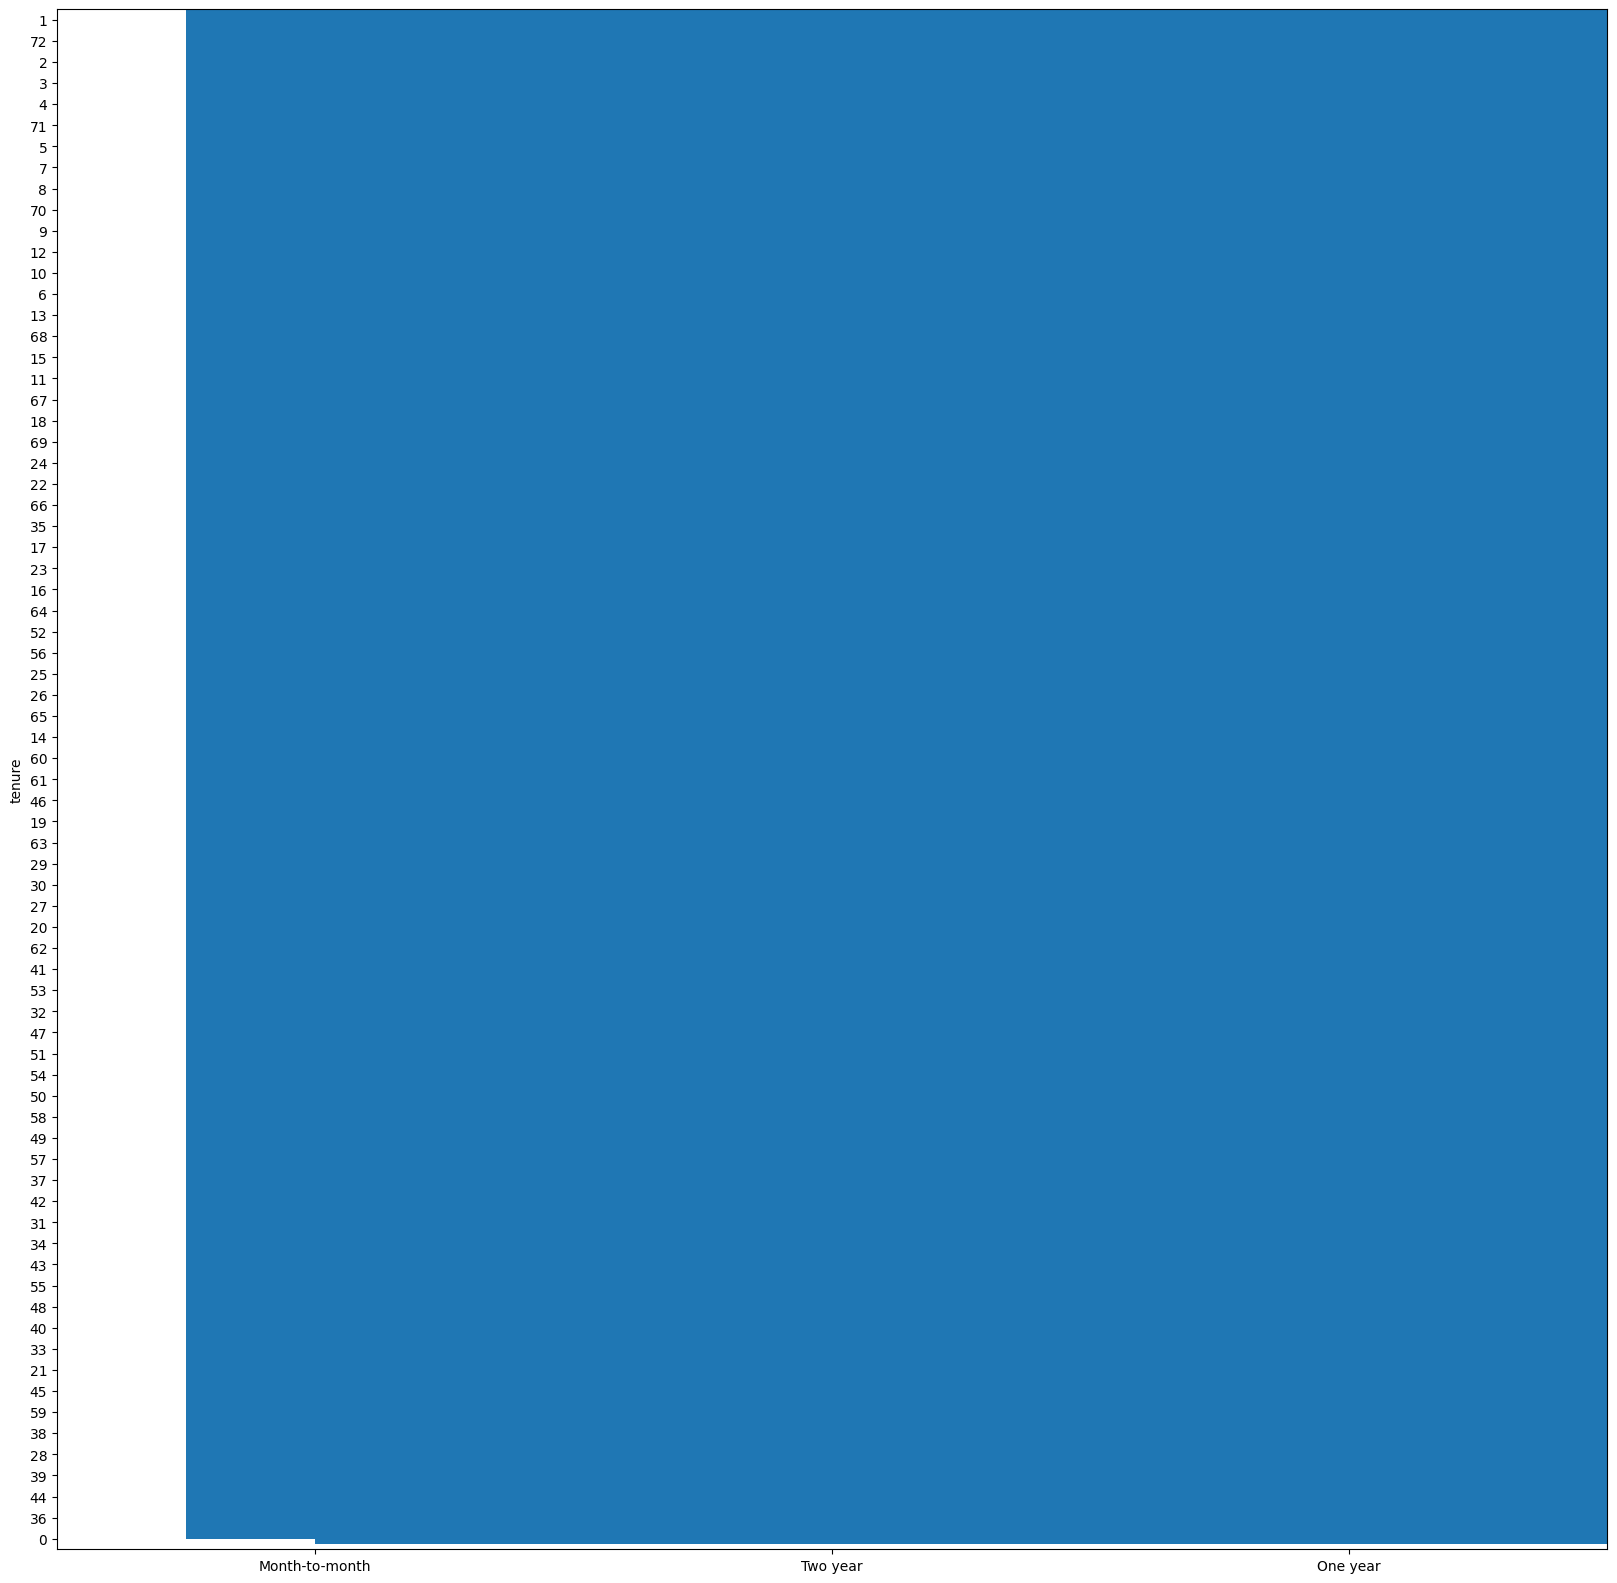

In [12]:
# Contar clientes usando a variável churn como referência
df_churn.Churn.value_counts()

# Como identificar valores possíveis (únicos) numa variável do DataFrame
df_churn.Churn.unique()

# Como é a distribuição de Clientes (%) que abandonaram ou continuam ativos
df_churn.Churn.value_counts(normalize=True)

# plot ditribuição Churn (quantidade)
ax = df_churn.Churn.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

# plot ditribuição Churn (percentual)
ax = df_churn.Churn.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

# Quais são os tipos de contrato
df_churn.Contract.unique()

# plot ditribuição Contract (quantidade)
ax = df_churn.Contract.value_counts().plot.bar()

ax.bar_label(ax.containers[0])

# plot ditribuição Contract (percentual)
ax = df_churn.Contract.value_counts(normalize=True).plot.bar()

ax.bar_label(ax.containers[0])

# Histograma do Tempo de Contrato
df_churn.tenure.plot.hist()

# Histograma do Monthly Charges
df_churn.MonthlyCharges.plot.hist()

# Medidas de Posição - Média Tempo de Contrato
df_churn.tenure.mean()

# Medidas de Posição - Mediana Tempo de Contrato
df_churn.tenure.median()

# Medidas de Posição - moda tempo de Contrato
df_churn.tenure.mode()

# Medidas de Dispersão - desvido padrão tempo de contrato
df_churn.tenure.std()

# Medidas de Dispersão - coeficiente de variação tempo de contrato
df_churn.tenure.std()/df_churn.tenure.mean()*100

# Quantos clientes possuem 1 mês de contrato - filtro
len(df_churn[(df_churn.tenure==1)])

# quanto os clientes de 1 mês representam percentualmente
len(df_churn[(df_churn.tenure==1)]) / len(df_churn)*100

# quantos clientes possuem entre 1 e 6 meses de contrato
len(df_churn[(df_churn.Genero=='Male') & (df_churn.tenure<=6)])

# Apresentar a quantidade de clientes por tempo de contrato - agrupamento com sumarização
df_churn.groupby(['tenure'])['tenure'].count().sort_values()

# Apresentar a quantidade de clientes por tempo de contrato - agrupamento com sumarização - Em um plot
df_churn.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize = (20,20))

## Análise bivariada

In [ ]:
# hipótese: Clientes com Contrato do Tipo mensal são mais propensos ao Churn
# Construir Tabela de Contingência entre Tipo de Contrato e Churn
pd.crosstab(df_churn.Churn, df_churn.Contract, margins=True, margins_name='Total')

# Construir Tabela de Contingência entre Tipo de Contrato e Churn - proporção
pd.crosstab(df_churn.Churn, df_churn.Contract, normalize='index',margins=True, margins_name='Total')



Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


In [14]:
# Avaliar a correlação entre duas variáveis categóricas (qualitativas)

# Executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
# Em um teste de hipótese, duas hipóteses são formuladas:
# H0 (Hipótese Nula): as duas variáveis são independentes
# H1 (Hipótese Complementar): as duas variáveis não são independentes

# O teste serve para confirmar ou recusar a hipótese nula
# Quando a probabilidade de observarmos H0 é inferior a 0.05 (p-value), 
# recusamos a hipótese nula e seguimos com a complementar

In [15]:
# Gerar um DF da crosstab (sem totais)

df_crosstab_churn_contract = pd.crosstab(df_churn.Churn, df_churn.Contract)

In [16]:
# Calcular os Scores e P-Values
from scipy.stats import chi2_contingency

In [17]:
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contract)

In [18]:
chi_scores_churn_contract

Chi2ContingencyResult(statistic=np.float64(1184.5965720837926), pvalue=np.float64(5.863038300673391e-258), dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [19]:
scores_churn_contract = pd.Series(chi_scores_churn_contract[0])

In [20]:
pvalues_churn_contract = pd.Series(chi_scores_churn_contract[1])

In [21]:
# Apresentar numeros com decimais sem notação científica
pd.set_option('display.float_format', lambda x:'%15f' % x)

In [22]:
# Criar Dataframe com os resultados
df_chiscores_churn_contract = pd.DataFrame({'Qui2': scores_churn_contract, 'p-value': pvalues_churn_contract})

In [23]:
# Analisar Scores e P-Values
df_chiscores_churn_contract

,Qui2,p-value
0,1184.596572,0.000000


In [24]:
# Criar coluna nova
df_churn['TempoMenor6Meses'] = np.where(df_churn.tenure<6, 'Yes', 'No')

In [25]:
# Gerar um DF da crosstab (sem totais)
df_crosstab_churn_tenure = pd.crosstab(df_churn.Churn, df_churn.TempoMenor6Meses)

In [26]:
# Calcular os Scores
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)

In [27]:
scores_churn_tenure= pd.Series(chi_scores_churn_tenure[0])
pvalues_churn_tenure = pd.Series(chi_scores_churn_tenure[1])

In [28]:
# Criar DataFrame com resultados
df_chiscores_churn_tenure = pd.DataFrame({'Qui2': scores_churn_tenure, 'p-value': pvalues_churn_tenure})

In [29]:
# Análisar os resultados
df_chiscores_churn_tenure

,Qui2,p-value
0,669.721616,0.000000


In [ ]:
# Correlação entre 2 variáveis numéricas
# Tenure com TotalCharges
# A intuição é que quanto mais tempo de contrato maior o valor pago
# Correlação entre 2 variáveis numéricas - Pearson
df_churn.tenure.corr(df_churn.TotalCharges)

np.float64(0.8258804609332024)

In [31]:
# Correlação entre 2 variáveis numéricas - Spearman
df_churn.tenure.corr(df_churn.TotalCharges, method='spearman')

np.float64(0.8891770805365491)

<Axes: xlabel='tenure', ylabel='TotalCharges'>

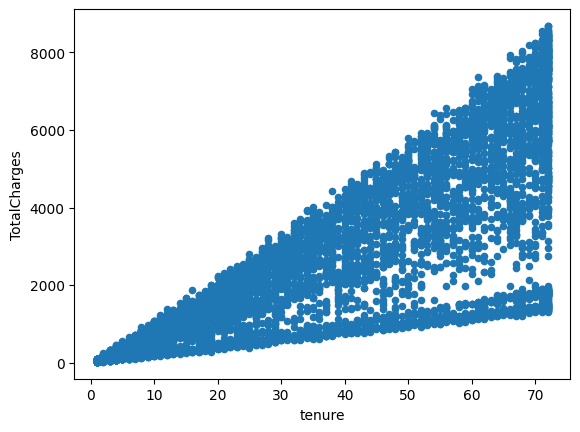

In [32]:
# Apresentar Plot Scatter entre Tenure e TotalCharges
df_churn.plot.scatter(x='tenure',y='TotalCharges')